In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
in_size = 1
out_size = 1
num_epochs = 60
lr = 0.001

In [3]:
# Toy Dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
[3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [27]:
linear = nn.Linear(in_features=in_size, out_features=out_size, bias=True)

In [28]:
# Loss and Optimizer

criterion = nn.L1Loss()
optimizer = torch.optim.SGD(linear.parameters(), lr=lr)

In [31]:
# Train the model

for epoch in range(num_epochs):
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    # Forward + Backward + Optimize
    # Clear all gradients
    optimizer.zero_grad()
    
    outputs = linear(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    # do Optimization Step
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print("Epoch [%d/%d], loss: %.4f" %(epoch+1, num_epochs,
                                          loss.data[0]))

Epoch [5/60], loss: 1.2295
Epoch [10/60], loss: 1.0406
Epoch [15/60], loss: 0.8639
Epoch [20/60], loss: 0.7280
Epoch [25/60], loss: 0.6070
Epoch [30/60], loss: 0.5358
Epoch [35/60], loss: 0.5118
Epoch [40/60], loss: 0.5089
Epoch [45/60], loss: 0.5061
Epoch [50/60], loss: 0.5032
Epoch [55/60], loss: 0.5004
Epoch [60/60], loss: 0.4975


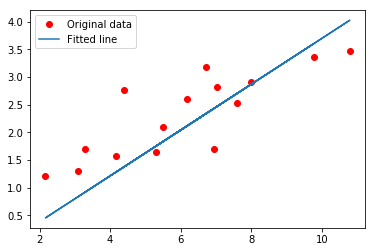

In [32]:
# Plot the graph
predicted = linear(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()

In [34]:
# save the model
torch.save(linear.state_dict(), "linear_regression.pkl")